In [138]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
plt.rcParams.update({'font.size': 12})
import seaborn as sns
import cmath

def custom_plot_single(x_lst, y_lst, label_lst, xlim, ylim, label,pltname,
                       color=['k','r','b','g','o','br'],
                       linestyle=['solid','dashed','solid','dashed','solid','dashed'],
                       markertype=[None,None,'o','^','o','^'],
                       fillstyle=['none','none','none','none','full','full'],
                       linewidth=20*[3],
                       markevery=[45,30,50,40,56,72,63,95]):
    
    fig, ax1 = plt.subplots(1,1)
    fig.set_size_inches(8,8)
    fig.patch.set_facecolor('white')
    ax1.patch.set_facecolor('white')
    for p in range(0, len(x_lst)):
        ax1.plot(x_lst[p], y_lst[p], color[p],
                 linewidth=linewidth[p],
                 linestyle=linestyle[p],
                 marker=markertype[p],
                 fillstyle=fillstyle[p],
                 markevery=markevery[p],
                 markersize=8,
                 label=label_lst[p])

    ax1.legend(prop={'size': 20},loc='best')
    ax1.tick_params(which='minor', width=2, length=4, color='k')
    ax1.tick_params(which='major', width=2, length=8, color='k')

    ax1.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax1.legend(prop={'size': 20},loc='best')

    ax1.set_ylim(ylim[0],ylim[1])
    ax1.set_xlim(xlim[0],xlim[1])

    ax1.set_xlabel(label[0], fontsize=25)
    ax1.set_ylabel(label[1], fontsize=25)
    plt.savefig(pltname, bbox_inches = "tight")

In [139]:
acc = 0.142e-9 #nm
hbar=1.06e-34
q=1.602e-19
gamma=2.5 #eV
acc=0.142e-9
m=17 
n=0
nano=1e-9

#N=num_layers_ch
#U=avg_field_ch

def get_radius(acc,m,n):
    return acc*(np.sqrt(3.)/(2*np.pi))*np.sqrt(m**2 + m*n + n**2)


R = get_radius(acc,m,n)
print('Radius of CNT (nm):', R/nano)

Eg_min = acc*gamma/R
print('bandgap, H/(eV):', Eg_min)

N=4
U=np.zeros(N)
print(U)
print('number of layers in the channel: ', N)
M=m
print('number of total modes or atoms along the ring', M)
M_red = M
print('number of modes used to construct hamiltonian', M_red)

Radius of CNT (nm): 0.665453976774103
bandgap, H/(eV): 0.5334704012453583
[0. 0. 0. 0.]
number of layers in the channel:  4
number of total modes or atoms along the ring 17
number of modes used to construct hamiltonian 17


In [140]:

def get_bandgap_for_mode(p,acc,gamma,m,n):
    R=get_radius(acc,m,n)
    Eg_case=np.zeros(6,dtype=float)
    if(p>0):
        Eg_case[0] = (acc*gamma/R)*np.abs(3*p - 2*m)
        Eg_case[1] = (acc*gamma/R)*np.abs(3*p - m)
        Eg_case[2] = (acc*gamma/R)*np.abs(3*p - m)
        Eg_case[3] = (acc*gamma/R)*np.abs(3*p - 2*m)
        Eg_case[4] = (acc*gamma/R)*np.abs(3*p - m)
        Eg_case[5] = (acc*gamma/R)*np.abs(3*p - m)
    elif(p<0):
        Eg_case[0] = (acc*gamma/R)*np.abs(3*p + 2*m)
        Eg_case[1] = (acc*gamma/R)*np.abs(3*p + m)
        Eg_case[2] = (acc*gamma/R)*np.abs(3*p + m)
        Eg_case[3] = (acc*gamma/R)*np.abs(3*p + 2*m)
        Eg_case[4] = (acc*gamma/R)*np.abs(3*p + m)
        Eg_case[5] = (acc*gamma/R)*np.abs(3*p + m)
     
    Eg = np.amin(Eg_case)
    min_index = np.argmin(Eg_case)
    return (Eg,min_index+1)


m_arranged=np.arange(1,m+1,1)
m_arranged_rev=np.zeros(np.size(m_arranged),dtype=int)
counter=0
for i in reversed(m_arranged):
    m_arranged_rev[counter] = -i
    counter=counter+1
M_arr = np.concatenate((m_arranged_rev,m_arranged))
#M_arr = np.arange(-m+1,m,1)

print('M_arr',M_arr)

Eg_arr = np.zeros(M, dtype=float)
counter=0
for p in range(1,m+1):
    eg, case = get_bandgap_for_mode(p,acc,gamma,m,n)
    Eg_arr[p-1]=eg
    print('mode, bandgap', p , Eg_arr[p-1], case)
    #counter +=1

print('minimum bandgap',np.amin(Eg_arr))
Eg_min_index_arr = np.where(Eg_arr==Eg_arr.min())
print('band with minimum bandgap:')
for j in Eg_min_index_arr:
    print(M_arr[M+j])
    
sorted_M_arr = [x for _,x in sorted(zip(Eg_arr,np.arange(1,m+1,1)))] 
print('sorted_M_arr:',sorted_M_arr)

M_red_arr = np.zeros(M_red,dtype=int)
for i in range(0,M_red):
    M_red_arr[i] = sorted_M_arr[i]
    
print('M_red_arr',M_red_arr)

M_arr [-17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   1
   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17]
mode, bandgap 1 7.468585617435016 2
mode, bandgap 2 5.868174413698941 2
mode, bandgap 3 4.267763209962866 2
mode, bandgap 4 2.6673520062267913 2
mode, bandgap 5 1.0669408024907165 2
mode, bandgap 6 0.5334704012453583 2
mode, bandgap 7 2.133881604981433 2
mode, bandgap 8 3.734292808717508 2
mode, bandgap 9 3.734292808717508 1
mode, bandgap 10 2.133881604981433 1
mode, bandgap 11 0.5334704012453583 1
mode, bandgap 12 1.0669408024907165 1
mode, bandgap 13 2.6673520062267913 1
mode, bandgap 14 4.267763209962866 1
mode, bandgap 15 5.868174413698941 1
mode, bandgap 16 7.468585617435016 1
mode, bandgap 17 9.06899682117109 1
minimum bandgap 0.5334704012453583
band with minimum bandgap:
[ 6 11]
sorted_M_arr: [6, 11, 5, 12, 7, 10, 4, 13, 8, 9, 3, 14, 2, 15, 1, 16, 17]
M_red_arr [ 6 11  5 12  7 10  4 13  8  9  3 14  2 15  1 16 17]


[6, 11, 5, 12, 7, 10, 4, 13, 8, 9, 3, 14, 2, 15, 1, 16, 17]
band,bandgap 6 0.5334704012453583
3
band,bandgap 11 0.5334704012453583
3
band,bandgap 5 1.0669408024907165
2.1952465443761056
band,bandgap 12 1.0669408024907165
2.1952465443761056
band,bandgap 7 2.133881604981433
1.2047768476488085
band,bandgap 10 2.133881604981433
1.2047768476488085
band,bandgap 4 2.6673520062267913
0.6611955528863462
band,bandgap 13 2.6673520062267913
0.6611955528863462
band,bandgap 8 3.734292808717508
0.36287181315765005
band,bandgap 9 3.734292808717508
0.36287181315765005
band,bandgap 3 4.267763209962866
0.19914827347145578
band,bandgap 14 4.267763209962866
0.19914827347145578
band,bandgap 2 5.868174413698941
0.10929488978917028
band,bandgap 15 5.868174413698941
0.10929488978917028
band,bandgap 1 7.468585617435016
0.05998230728191081
band,bandgap 16 7.468585617435016
0.05998230728191081
band,bandgap 17 9.06899682117109
0.03291898819608012


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


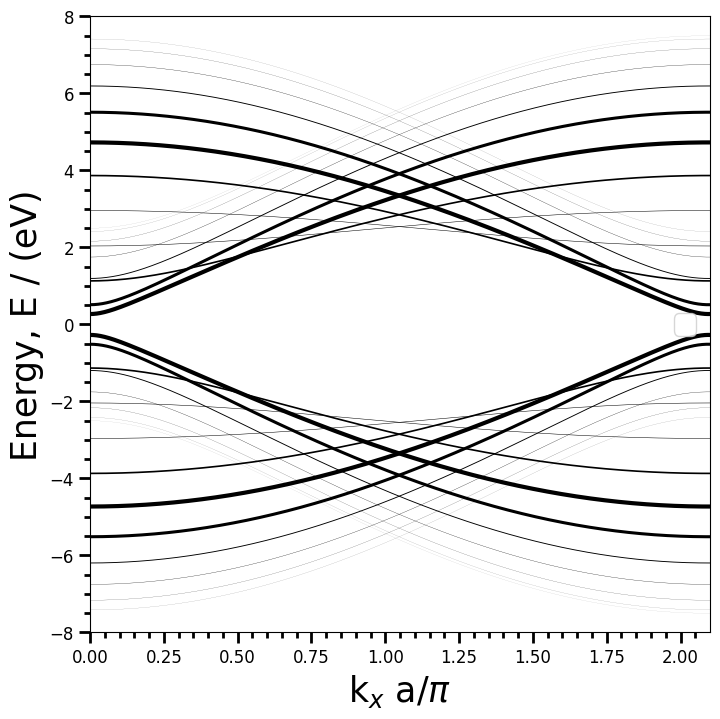

In [141]:
def get_dispersion_leonard(m,n,acc,gamma,p,E_nu,kxa_arr):
    Cx=acc*(np.sqrt(3)*m+(np.sqrt(3)/2.)*n)
    Cy=acc*(3/2.)*n
    C=np.sqrt(Cx**2+Cy**2)
    for kxa in kxa_arr:
        factor1 = 3*Cx*kxa/(2*C) - 3*np.pi*p*acc*Cy/(C**2)
        factor2 = np.sqrt(3)*Cy*kxa/(2*C) + np.sqrt(3)*np.pi*p*acc*Cx/(C**2)
        E_nu.append(gamma*np.sqrt(1+(4*np.cos(factor1)*np.cos(factor2))+(4*np.cos(factor2)**2)))
        
def get_dispersion(m,gamma,nu,E_nu,kxa_arr):
    kyb=2*np.pi*nu/(2*m)
    for kxa in kxa_arr:
        E_nu.append(gamma*np.sqrt(1+(4*np.cos(kyb)*np.cos(kxa))+(4*np.cos(kyb)**2)))
        
k=np.linspace(0,2.1,1201)    
nu_label=str(sorted_M_arr)
print(nu_label)
E=[]
linewidth=[]
counter=0
lw=3
for p in sorted_M_arr:
    E_nu=[]
    get_dispersion_leonard(m,n,acc,gamma,p,E_nu,k)
#    get_dispersion(m,gamma,p,E_nu,k*np.pi)
    print('band,bandgap',p,Eg_arr[p-1])
    E.append(E_nu)
    E_nu_inv = []
    for i in range(0,len(k)):
        E_nu_inv.append(-1*E_nu[i])
    E.append(E_nu_inv)
    print(lw)
    linewidth.append(lw)
    linewidth.append(lw)
    counter += 1
    if (counter%2 == 0):
        lw=4*np.exp(-0.3*counter)


custom_plot_single(2*m*[k], 
                   E,
                   2*m*[None],
                   [0,2.1],[-8,8],[r'k$_x$ a/$\pi$',r'Energy, E / (eV)'],'Dispersion_all.png',
                   2*m*['k'],
                   2*m*['solid'],
                   2*m*[None],
                   2*m*['none'],
                   linewidth,2*m*['none'])

In [170]:
#define E-space
Emin=0.001 #eV
Emax=8.001 #eV
Epts=1000

E_space=np.linspace(Emin,Emax,Epts,dtype=float)

In [171]:
#Mode_arr_Mintmire=np.linspace(-M,M,2*M+1)
Mode_arr_Mintmire=np.arange(1,M+1,1)
print(Mode_arr_Mintmire)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


In [208]:
np.linspace(-2,2,1000)

array([-2.        , -1.995996  , -1.99199199, -1.98798799, -1.98398398,
       -1.97997998, -1.97597598, -1.97197197, -1.96796797, -1.96396396,
       -1.95995996, -1.95595596, -1.95195195, -1.94794795, -1.94394394,
       -1.93993994, -1.93593594, -1.93193193, -1.92792793, -1.92392392,
       -1.91991992, -1.91591592, -1.91191191, -1.90790791, -1.9039039 ,
       -1.8998999 , -1.8958959 , -1.89189189, -1.88788789, -1.88388388,
       -1.87987988, -1.87587588, -1.87187187, -1.86786787, -1.86386386,
       -1.85985986, -1.85585586, -1.85185185, -1.84784785, -1.84384384,
       -1.83983984, -1.83583584, -1.83183183, -1.82782783, -1.82382382,
       -1.81981982, -1.81581582, -1.81181181, -1.80780781, -1.8038038 ,
       -1.7997998 , -1.7957958 , -1.79179179, -1.78778779, -1.78378378,
       -1.77977978, -1.77577578, -1.77177177, -1.76776777, -1.76376376,
       -1.75975976, -1.75575576, -1.75175175, -1.74774775, -1.74374374,
       -1.73973974, -1.73573574, -1.73173173, -1.72772773, -1.72

In [199]:
# ###Francois' book

# D_th_lin = np.zeros(Epts, dtype=float)

# for e in range(0,Epts):
#     const = acc*np.sqrt(3)/(np.pi**2*R*gamma)
#     Sum=0.
#     for nu in Mode_arr_Mintmire:
#         eps_m = np.abs(3*nu+1)*acc*gamma/(2*R) 
#         if(np.abs(E[e]) > np.abs(eps_m)):
#             Sum += np.abs(E[e])/cmath.sqrt(E[e]**2 - eps_m**2)
#         elif(np.abs(E[e]) < np.abs(eps_m)):
#             Sum +=0
#     D_th_lin[e] = const*np.real(Sum)#*num_atoms
    
    
dE_dk = np.zeros((M,np.size(k)),dtype=float)
for p in range(1,M+1):
    dE_dk[p-1] = np.gradient(E[2*(p-1)])
    
# D_th = np.zeros(Epts, dtype=float)   
# for e in range(0,Epts):
#     Sum=0.
#     for p in range(1,M+1):
#         k_sum=0.
#         for kx in range(0,np.size(k)):
#             convergence=np.abs((E_space[e]-E[2*(p-1)][kx])/E_space[e])
#             if(convergence < 1e-3): 
#                 k_sum += 1./np.abs(dE_dk[p-1][kx])
#                 print('mode, convergence', p, convergence)
#             else:
#                 k_sum=0.
#         Sum += k_sum*(k[1]-k[0])
#     D_th[e] = const*Sum #*num_atoms
    
D_th = np.zeros(Epts, dtype=float)   
for e in range(0,Epts):
    Sum=0.
    for p in range(1,M+1):
        k_sum=0.
        for kx in range(0,np.size(k)):
            for i in np.linspace(-2,2,1000):
                k_sum += np.exp(1j*i*(kx-kx))*(4/1000)*(1./np.abs(dE_dk[p-1][kx]))
                print('mode, convergence', p, convergence)
            else:
                k_sum=0.
        Sum += k_sum*(k[1]-k[0])
    D_th[e] = const*Sum #*num_atoms
    

mode, convergence 2 0.0007352971117530379
mode, convergence 2 0.00011151110861578841
mode, convergence 1 6.625565255775684e-05
mode, convergence 2 2.951523626547784e-05
mode, convergence 1 0.00025371200196083645
mode, convergence 2 0.000810395999731753
mode, convergence 1 0.0009661341899860735
mode, convergence 1 0.0003990635147927261
mode, convergence 2 0.0007077043487553749
mode, convergence 3 0.000758232179992101
mode, convergence 3 0.0001094899061433374
mode, convergence 3 0.0003427486864109397
mode, convergence 3 0.000598213720720744
mode, convergence 3 0.0006567525307184438
mode, convergence 3 0.0005183301116731554
mode, convergence 3 0.00018302922352696376
mode, convergence 3 0.00034894985342213297
mode, convergence 4 0.0006608030144562301
mode, convergence 4 0.0005623211887392527
mode, convergence 4 0.00026693459750218665
mode, convergence 4 0.00022518027536097782
mode, convergence 4 0.000913729868498697
mode, convergence 2 0.00011120315714405456
mode, convergence 3 0.000252025

mode, convergence 7 0.0009048404372822322
mode, convergence 7 0.00015002039673536906
mode, convergence 8 0.0009606517287164007
mode, convergence 8 6.048800387685424e-05
mode, convergence 1 0.00022010470284135987
mode, convergence 5 0.0004594168220100795
mode, convergence 6 0.00016304857721847614
mode, convergence 7 0.0001904352773053317
mode, convergence 8 0.0008141059210759364
mode, convergence 8 0.0004501518691068761
mode, convergence 2 0.0005776853447163392
mode, convergence 3 0.0007222242670678697
mode, convergence 5 0.0004291176264674697
mode, convergence 6 0.0007750811330322145
mode, convergence 6 0.0007367569596440629
mode, convergence 7 0.0005064849425425898
mode, convergence 7 0.0009437704556125184
mode, convergence 8 0.0006529009647910768
mode, convergence 8 0.0008054761620372998
mode, convergence 3 0.0005766513247090596
mode, convergence 4 0.00047721537749064445
mode, convergence 5 6.28950443701419e-05
mode, convergence 6 0.0003787853999968879
mode, convergence 7 0.000173593

mode, convergence 5 0.0008740158899615183
mode, convergence 6 0.000759496251180278
mode, convergence 1 0.0005401103536454669
mode, convergence 4 0.0003037040042763564
mode, convergence 5 0.00032872764192748996
mode, convergence 6 8.695761263062306e-05
mode, convergence 7 0.0008883325415946642
mode, convergence 8 0.00024036347325098753
mode, convergence 1 0.0009239914160480146
mode, convergence 2 0.000153817927625688
mode, convergence 5 0.0005490294417795784
mode, convergence 6 0.0009652467195477756
mode, convergence 7 0.00024215693416282903
mode, convergence 8 0.0008932045744958695
mode, convergence 5 0.0005949362669914247
mode, convergence 6 0.00017913560891579571
mode, convergence 1 5.469945707861113e-05
mode, convergence 2 0.0007067269509666606
mode, convergence 3 0.0002480795012409062
mode, convergence 5 0.000339925963312678
mode, convergence 6 0.000756128994597586
mode, convergence 7 0.0005745886991107331
mode, convergence 8 7.904855899103755e-05
mode, convergence 2 0.000740508414

mode, convergence 5 0.0008998915952139257
mode, convergence 6 0.0006332811237118286
mode, convergence 7 0.0002712510197331173
mode, convergence 8 0.0009238561043956601
mode, convergence 11 0.00013180230889103282
mode, convergence 12 0.0001380485916282358
mode, convergence 1 0.0005874630069801734
mode, convergence 3 0.0004217688664472942
mode, convergence 4 0.0003023206051607812
mode, convergence 5 0.00036454050998716
mode, convergence 6 0.0007534726367110088
mode, convergence 7 0.0008877503917361839
mode, convergence 8 0.00023664171147713892
mode, convergence 11 0.0009531871009964517
mode, convergence 11 0.0004384348956376463
mode, convergence 12 0.00015779301009238853
mode, convergence 1 0.0006917148879816888
mode, convergence 2 6.9537654457131e-05
mode, convergence 4 0.0004897973842329482
mode, convergence 5 0.00016143312278216226
mode, convergence 6 0.00022627910748142813
mode, convergence 11 0.0008761648032032184
mode, convergence 11 0.00056724935952397
mode, convergence 12 0.00027

mode, convergence 7 4.058415611999505e-05
mode, convergence 8 0.0006615794694267715
mode, convergence 11 2.338876560058202e-05
mode, convergence 12 0.0004027811128398956
mode, convergence 2 0.0008663311969361193
mode, convergence 3 0.0007422030899797425
mode, convergence 5 3.3463691351049544e-05
mode, convergence 6 0.00032415594471454787
mode, convergence 7 0.0008430435594613908
mode, convergence 8 0.00022371717188074508
mode, convergence 11 0.00025030127080977676
mode, convergence 12 0.0006798181840272762
mode, convergence 1 9.993862813954842e-05
mode, convergence 2 0.000650573409601142
mode, convergence 3 4.272350289607594e-06
mode, convergence 4 0.0006499973182785036
mode, convergence 5 0.0004396158678878958
mode, convergence 6 8.332203015252947e-05
mode, convergence 9 0.0009215286984689538
mode, convergence 9 0.0008148212559635802
mode, convergence 9 0.0007099847122450587
mode, convergence 9 0.0006070203778734534
mode, convergence 9 0.0005059295404646914
mode, convergence 9 0.00040

mode, convergence 2 0.0006652671345157784
mode, convergence 4 0.00039424763949396106
mode, convergence 5 0.0007627120540956913
mode, convergence 5 0.0009286356220001317
mode, convergence 6 0.000585624847813048
mode, convergence 7 0.0009893374732829687
mode, convergence 8 0.00038640292161941673
mode, convergence 9 0.0009737940116167395
mode, convergence 9 0.0006143801830388676
mode, convergence 9 0.000256326994385253
mode, convergence 9 0.00010036162412213028
mode, convergence 9 0.0004556817525193252
mode, convergence 9 0.0008096294811892884
mode, convergence 10 0.0007379604936837647
mode, convergence 10 0.0003837341286935203
mode, convergence 10 2.8136156000091872e-05
mode, convergence 10 0.00032882951267357367
mode, convergence 10 0.0006871589552760227
mode, convergence 11 0.000672924374483027
mode, convergence 12 0.00021901744195826546
mode, convergence 1 0.00021614152218549514
mode, convergence 2 0.0007390143597451151
mode, convergence 5 0.0003718774174853659
mode, convergence 6 0.0

mode, convergence 7 0.00016424496969483996
mode, convergence 8 0.0007519810329264276
mode, convergence 9 0.0006322139492271679
mode, convergence 9 0.00018436388442679354
mode, convergence 9 0.0002625459351779918
mode, convergence 9 0.000708511166530276
mode, convergence 10 0.0006181465941374999
mode, convergence 10 0.00017198945064033686
mode, convergence 10 0.00027511140056789686
mode, convergence 10 0.0007231516158695344
mode, convergence 12 0.000836568138159228
mode, convergence 13 0.0005101567050301533
mode, convergence 13 0.0002703250439099422
mode, convergence 14 0.0008811890034870828
mode, convergence 14 0.00011332257856310798
mode, convergence 14 0.0006703640769049862
mode, convergence 2 0.0008689274568448664
mode, convergence 3 0.00011891352953663492
mode, convergence 4 0.0007102105463970808
mode, convergence 5 0.0001829604765913219
mode, convergence 6 0.00014528058894956497
mode, convergence 7 0.000569368955146532
mode, convergence 8 1.6694935494334443e-05
mode, convergence 9

mode, convergence 3 0.0004578395426893684
mode, convergence 4 0.00011219760640846729
mode, convergence 5 0.00047025724443421546
mode, convergence 6 0.00015408041236299636
mode, convergence 8 0.0006390252130568374
mode, convergence 9 0.0007138387824692743
mode, convergence 9 0.00022511863808302322
mode, convergence 9 0.00026301603449731394
mode, convergence 9 0.0007505610112466988
mode, convergence 10 0.0006517354297627589
mode, convergence 10 0.00016407052197992285
mode, convergence 10 0.0003241832248843543
mode, convergence 10 0.0008130215871146719
mode, convergence 11 0.00022070104352322025
mode, convergence 12 0.0006962804691591983
mode, convergence 13 0.0002161760037679903
mode, convergence 14 3.775458693541796e-05
mode, convergence 1 0.0007909014596063132
mode, convergence 2 0.0003136801476985022
mode, convergence 4 0.0005828728750919747
mode, convergence 5 0.0006951149759575092
mode, convergence 5 0.000857269526377343
mode, convergence 6 0.0005424057436194122
mode, convergence 7 

mode, convergence 11 0.0002803212439435081
mode, convergence 12 0.0001978349732472094
mode, convergence 13 0.0004176273903468984
mode, convergence 14 0.0007724686929978758
mode, convergence 14 0.000721559989949314
mode, convergence 1 0.0005238618927351878
mode, convergence 2 0.0009819832914974708
mode, convergence 3 0.0008759257936660105
mode, convergence 5 0.00016122341668025364
mode, convergence 6 0.0004639859138254056
mode, convergence 7 0.0004965310726581357
mode, convergence 9 0.0005196035055084055
mode, convergence 9 1.8146712931496877e-05
mode, convergence 9 0.00048302034216841716
mode, convergence 9 0.0009838937677917623
mode, convergence 10 0.0008823412463790395
mode, convergence 10 0.0003814079583029587
mode, convergence 10 0.00011981816965010917
mode, convergence 10 0.000621333246252882
mode, convergence 12 0.0008377890209573
mode, convergence 13 3.589063224387443e-05
mode, convergence 14 0.00034348901519759437
mode, convergence 1 0.0006041422897893761
mode, convergence 2 0.

mode, convergence 3 1.7074022274065336e-06
mode, convergence 4 0.0005266955059388536
mode, convergence 5 0.0008352451488391429
mode, convergence 5 0.0005988801488699184
mode, convergence 6 0.0003079781125583529
mode, convergence 7 0.0002489187452623388
mode, convergence 8 0.0007914086138907535
mode, convergence 9 0.0009789909629761124
mode, convergence 9 0.0004822043716475283
mode, convergence 9 1.4523611979208181e-05
mode, convergence 9 0.0005111894752073842
mode, convergence 10 0.00090708533031986
mode, convergence 10 0.00041047150916944487
mode, convergence 10 8.620723617663559e-05
mode, convergence 10 0.0005829473891590551
mode, convergence 11 0.0006839966694252029
mode, convergence 12 0.0002059202885479306
mode, convergence 13 0.00033375878849126737
mode, convergence 14 0.0009960362309692037
mode, convergence 14 0.0006730592419126818
mode, convergence 15 0.0007288573047882229
mode, convergence 15 0.00022597233403170552
mode, convergence 15 0.00026294689199489755
mode, convergence 

mode, convergence 13 0.0005458821199069902
mode, convergence 14 0.0008709017191327758
mode, convergence 14 0.0009071797324359059
mode, convergence 15 0.0002894942202281961
mode, convergence 15 0.0006916160637239209
mode, convergence 16 0.0004936393878885642
mode, convergence 16 0.0004899557215694177
mode, convergence 17 0.0007706272407561704
mode, convergence 17 0.0005171347463395348
mode, convergence 17 0.0002500211924198855
mode, convergence 17 3.0700666412992024e-05
mode, convergence 17 0.0003250174399297378
mode, convergence 17 0.0006329151049849212
mode, convergence 17 0.0009543790083673512
mode, convergence 1 0.0008975805139668492
mode, convergence 2 0.0007581574986667302
mode, convergence 3 0.0008479755023845554
mode, convergence 5 0.0006860007258902221
mode, convergence 5 0.0006833788341463494
mode, convergence 6 0.00040559797387437746
mode, convergence 6 0.0009635993204043523
mode, convergence 7 0.000456565479175845
mode, convergence 8 7.055016681950272e-05
mode, convergence 9

mode, convergence 4 0.000502646819312845
mode, convergence 5 8.452378697115845e-05
mode, convergence 6 0.0009562857645057065
mode, convergence 6 0.00034919261642063466
mode, convergence 8 0.0005169333503707068
mode, convergence 9 0.0008893640775736982
mode, convergence 9 0.00044367753621273476
mode, convergence 9 2.350962574845532e-06
mode, convergence 9 0.0004487188010913944
mode, convergence 9 0.0008954233563408419
mode, convergence 10 0.0008048051918993939
mode, convergence 10 0.00035816871005453016
mode, convergence 10 8.813052268890194e-05
mode, convergence 10 0.0005340898844096415
mode, convergence 10 0.0009797067584841651
mode, convergence 12 0.0005643186152860703
mode, convergence 13 0.0007292125919986718
mode, convergence 14 0.0007592364260129683
mode, convergence 15 7.546483795403378e-05
mode, convergence 16 0.0009482127091304716
mode, convergence 16 0.0003369362574364496
mode, convergence 17 0.00031005666058406825
mode, convergence 17 0.0006487287326787661
mode, convergence 

mode, convergence 13 0.00038492552201530294
mode, convergence 14 5.029919210849454e-06
mode, convergence 15 4.979656257016714e-05
mode, convergence 16 0.00024939254993571917
mode, convergence 17 0.0005927111345142957
mode, convergence 17 0.0006528928310345569
mode, convergence 1 0.0004425386654111407
mode, convergence 2 0.0008249241200222843
mode, convergence 3 0.00037118764182478823
mode, convergence 4 0.0008381709790840626
mode, convergence 5 0.0004563251112694329
mode, convergence 5 0.0007729702340120594
mode, convergence 6 0.0005235824876315264
mode, convergence 6 0.0007054910733639095
mode, convergence 7 0.0001436824757129526
mode, convergence 8 0.0003507190062770542
mode, convergence 9 0.0006191262714387247
mode, convergence 9 0.00022659287382026638
mode, convergence 9 0.00016646829250002173
mode, convergence 9 0.0005600551401715656
mode, convergence 9 0.0009541655768297252
mode, convergence 10 0.0008741982960637969
mode, convergence 10 0.00048019387315515095
mode, convergence 10

mode, convergence 8 0.0001407196712850072
mode, convergence 9 0.0007075261436830045
mode, convergence 9 0.0003741365263908381
mode, convergence 9 4.008615518486966e-05
mode, convergence 9 0.00029462332933625433
mode, convergence 9 0.0006299902819072006
mode, convergence 9 0.0009660130525951476
mode, convergence 10 0.0008978151607827227
mode, convergence 10 0.0005619252555123774
mode, convergence 10 0.00022669150334102083
mode, convergence 10 0.00010788444674605867
mode, convergence 10 0.00044180095042993886
mode, convergence 10 0.0007750563680571028
mode, convergence 11 0.00013401633976607296
mode, convergence 12 0.00032424035347746247
mode, convergence 13 0.00032281062329509385
mode, convergence 14 0.0007198629612016466
mode, convergence 15 1.8704242660533055e-05
mode, convergence 16 0.00030561611184835006
mode, convergence 17 0.0008477930108493483
mode, convergence 17 0.0005764555419368279
mode, convergence 1 0.0004555151385425881
mode, convergence 2 9.092146746358286e-05
mode, conve

mode, convergence 15 0.0005147208782357882
mode, convergence 16 0.00017930554086778247
mode, convergence 17 0.0003664520101340912
mode, convergence 1 0.0008166237786457111
mode, convergence 1 0.0009267261657249577
mode, convergence 2 0.000573041507082658
mode, convergence 3 0.000581703155353966
mode, convergence 4 0.0001452134291012921
mode, convergence 5 0.000972520373433067
mode, convergence 5 0.00014354145476894368
mode, convergence 6 8.289242561211729e-05
mode, convergence 7 6.900070158657623e-05
mode, convergence 8 0.00039982233656194453
mode, convergence 9 0.000860959557091274
mode, convergence 9 0.0005885334334581523
mode, convergence 9 0.00031535275269252807
mode, convergence 9 4.141877958605761e-05
mode, convergence 9 0.00023326721671035317
mode, convergence 9 0.0005087039626838868
mode, convergence 9 0.0007848901804579351
mode, convergence 10 0.0007288194711612469
mode, convergence 10 0.0004527851417342864
mode, convergence 10 0.00017750054361182667
mode, convergence 10 9.703

mode, convergence 7 0.0005728057049282895
mode, convergence 8 0.00011767720149351387
mode, convergence 9 0.0009989420738655047
mode, convergence 9 0.0008374516894432908
mode, convergence 9 0.000675103518800241
mode, convergence 9 0.0005118982633235405
mode, convergence 9 0.00034783662837795223
mode, convergence 9 0.0001829193233097763
mode, convergence 9 1.71470614465457e-05
mode, convergence 9 0.00014947943990129857
mode, convergence 9 0.0003169594594372092
mode, convergence 9 0.00048529227187929405
mode, convergence 9 0.0006544771479565086
mode, convergence 9 0.000824513354409113
mode, convergence 9 0.0009954001539850168
mode, convergence 10 0.0009606758222945671
mode, convergence 10 0.0007899614620513195
mode, convergence 10 0.0006200978447680314
mode, convergence 10 0.0004510857068864133
mode, convergence 10 0.0002829257808578052
mode, convergence 10 0.00011561879514363311
mode, convergence 10 5.083452578215378e-05
mode, convergence 10 0.00021643346143171275
mode, convergence 10 0.

mode, convergence 14 0.0001997956098103336
mode, convergence 15 5.937398954287916e-05
mode, convergence 16 0.00029735337661409216
mode, convergence 17 0.0009255807734399737
mode, convergence 17 0.0007340121813808181
mode, convergence 1 0.00021832588401431518
mode, convergence 2 0.00010394632727887915
mode, convergence 3 0.0002102125045620861
mode, convergence 4 0.00019338363529244662
mode, convergence 5 4.039192941432995e-05
mode, convergence 5 0.0009466034489074713
mode, convergence 6 0.0007463357861750426
mode, convergence 6 0.0002403926663869669
mode, convergence 7 0.000574176004465012
mode, convergence 11 0.0009629456849630914
mode, convergence 12 0.0007481793222042632
mode, convergence 13 0.0006756038032484604
mode, convergence 14 0.0008962963429781329
mode, convergence 15 0.0007928227632171436
mode, convergence 15 0.0009686265896464091
mode, convergence 16 0.0006118165551096472
mode, convergence 17 0.00027279362031342293
mode, convergence 1 0.0002903330601644091
mode, convergence

mode, convergence 17 0.000340587046269684
mode, convergence 1 0.00016096113998718785
mode, convergence 2 0.0001376102795947648
mode, convergence 3 0.00016396178536795235
mode, convergence 4 0.0002149824698994405
mode, convergence 5 0.0004755841587025916
mode, convergence 5 0.0004051421116931827
mode, convergence 6 0.00022642023529536866
mode, convergence 6 0.0006540254728609965
mode, convergence 7 0.0006883270838476559
mode, convergence 8 0.0009572348593554422
mode, convergence 11 0.0009238222858029109
mode, convergence 12 0.0007292076292949511
mode, convergence 13 0.00046246690886556546
mode, convergence 14 6.686810572311055e-05
mode, convergence 15 0.0007894318099256455
mode, convergence 16 0.00042575293532880784
mode, convergence 17 0.0004914045574778483
mode, convergence 1 0.00022970966632336707
mode, convergence 2 0.0009389666329270571
mode, convergence 2 0.0005268354053419122
mode, convergence 3 0.0008440738455661484
mode, convergence 4 0.0004664137116426765
mode, convergence 5 0

mode, convergence 11 0.00012903015574492274
mode, convergence 12 0.00027358766384818974
mode, convergence 13 2.035440271453493e-05
mode, convergence 14 0.0004076964137294552
mode, convergence 15 0.00014732093828368005
mode, convergence 16 0.00021770638982514283
mode, convergence 17 0.00017455009909024942
mode, convergence 1 0.0009400268597927078
mode, convergence 1 0.00039553909434546984
mode, convergence 2 0.00012455078621015692
mode, convergence 3 0.00019522796723911098
mode, convergence 4 0.00015531098355179725
mode, convergence 5 0.0002918545288342505
mode, convergence 5 0.00045565918907777625
mode, convergence 6 0.00030394748722195375
mode, convergence 6 0.00044327277159844815
mode, convergence 7 0.0004864939574917251
mode, convergence 8 0.000879378934287091
mode, convergence 11 0.0005686708143278966
mode, convergence 12 0.00016696720336912207
mode, convergence 13 0.0004942142173024988
mode, convergence 14 0.00010745653677771873
mode, convergence 15 0.0007707845434942463
mode, con

mode, convergence 1 0.0004699630056061073
mode, convergence 1 0.0008037954874710618
mode, convergence 2 0.0005453415359859003
mode, convergence 2 0.0007280719805385727
mode, convergence 3 0.00035024335461546403
mode, convergence 4 1.2513769426962241e-05
mode, convergence 5 0.0006131261033844921
mode, convergence 5 6.764986410654767e-05
mode, convergence 5 0.0007498978699555406
mode, convergence 6 0.0006114199958635551
mode, convergence 6 7.052961896543937e-05
mode, convergence 6 0.0007510068535800947
mode, convergence 7 0.0005272406353366005
mode, convergence 8 0.00014597848808428862
mode, convergence 11 0.0009711927354593149
mode, convergence 11 0.0009651775254182542
mode, convergence 12 0.0005724927783509706
mode, convergence 13 0.00022280487515318387
mode, convergence 14 0.0006044998553859766
mode, convergence 15 0.00045888550709346907
mode, convergence 16 0.000969496237054555
mode, convergence 16 0.0008224990302409991
mode, convergence 17 7.811249845640015e-05
mode, convergence 1 0

mode, convergence 6 0.0007280029913511293
mode, convergence 7 0.0002968057180378826
mode, convergence 8 7.187652304928653e-05
mode, convergence 11 0.00014696745062089508
mode, convergence 12 0.0005297409760749931
mode, convergence 13 0.0006846357711448162
mode, convergence 14 0.0007911072675241416
mode, convergence 15 0.00020497312041413047
mode, convergence 16 0.00015574556485529193
mode, convergence 17 0.000616577327678929
mode, convergence 1 0.0009059803335976621
mode, convergence 1 0.0002940307042550826
mode, convergence 2 5.05323825485548e-05
mode, convergence 3 0.0009755441460754122
mode, convergence 3 0.0006160101457400248
mode, convergence 4 0.0002931134171972872
mode, convergence 5 0.0007047904433966842
mode, convergence 5 0.0001073253502638284
mode, convergence 5 0.0004916387115276016
mode, convergence 6 0.0009702065323976408
mode, convergence 6 0.0003700485181644619
mode, convergence 6 0.00022861167064609528
mode, convergence 6 0.000825772600433984
mode, convergence 7 0.0007

mode, convergence 15 4.5367538060936736e-05
mode, convergence 16 0.00040288907545536193
mode, convergence 17 0.0004426379107844393
mode, convergence 1 0.0003889703566744198
mode, convergence 1 0.0007520604607022346
mode, convergence 2 0.0005205231811784288
mode, convergence 2 0.0006201618691366014
mode, convergence 3 0.00010038647956474642
mode, convergence 4 0.0004111169456437434
mode, convergence 5 0.0008907745459422467
mode, convergence 5 0.0003679621401712895
mode, convergence 5 0.00015636929286432164
mode, convergence 5 0.0006822185283986026
mode, convergence 6 0.0005754543894183086
mode, convergence 6 4.991286294593138e-05
mode, convergence 6 0.00047411061230574997
mode, convergence 6 0.000996614812426771
mode, convergence 7 0.000283193482378546
mode, convergence 8 7.32723111426257e-05
mode, convergence 11 0.0006487937072719157
mode, convergence 12 0.0002758817542168966
mode, convergence 13 0.0004845839632782472
mode, convergence 14 0.00011582666663396493
mode, convergence 15 0.0

mode, convergence 2 0.00048793215536907405
mode, convergence 2 0.0005939436354828476
mode, convergence 3 0.0004249948275471851
mode, convergence 4 0.0007508863167618432
mode, convergence 4 0.0007239583537606945
mode, convergence 5 0.0007943275961036707
mode, convergence 5 0.0003525667353579817
mode, convergence 5 9.073048669183764e-05
mode, convergence 5 0.0005355630577040028
mode, convergence 5 0.000981929961387909
mode, convergence 6 0.0008912833842793521
mode, convergence 6 0.00044522755881896454
mode, convergence 6 7.062724520766847e-07
mode, convergence 6 0.0004422794593314856
mode, convergence 6 0.0008837286249913262
mode, convergence 7 4.8439159104490255e-06
mode, convergence 8 0.00035044391227073615
mode, convergence 11 0.0007504888462654567
mode, convergence 12 0.0006803111454369306
mode, convergence 13 0.0007355584655514501
mode, convergence 14 0.0006893395394035406
mode, convergence 15 0.00011329861301289754
mode, convergence 16 0.0004665598764870863
mode, convergence 17 0.0

mode, convergence 15 0.0008771481796584078
mode, convergence 15 0.0008429441815824897
mode, convergence 16 0.0004942046418364407
mode, convergence 17 0.0006176213757384113
mode, convergence 1 0.0006068837353386704
mode, convergence 1 0.00041099184844859446
mode, convergence 2 0.00020443000095283565
mode, convergence 2 0.0008130991202554299
mode, convergence 3 0.00035839807764147746
mode, convergence 4 7.177584941543264e-05
mode, convergence 5 0.0009512741213965902
mode, convergence 5 0.0006147165208142242
mode, convergence 5 0.0002766049459170558
mode, convergence 5 6.305984866090599e-05
mode, convergence 5 0.0004042771045834925
mode, convergence 5 0.0007470460598120189
mode, convergence 6 0.000677407588811131
mode, convergence 6 0.0003349532543007019
mode, convergence 6 5.949226064222525e-06
mode, convergence 6 0.0003452990909955494
mode, convergence 6 0.0006830955829082971
mode, convergence 7 0.00041345932304695526
mode, convergence 8 7.941686314671987e-05
mode, convergence 11 0.0001

mode, convergence 3 0.0005785613733361271
mode, convergence 3 0.0007798815181379968
mode, convergence 4 0.0005042572159893592
mode, convergence 4 0.0008538495403183983
mode, convergence 5 0.000886583244036373
mode, convergence 5 0.0006777398093997819
mode, convergence 5 0.0004673284452340935
mode, convergence 5 0.00025534961238619306
mode, convergence 5 4.180377521974827e-05
mode, convergence 5 0.0001733085983840919
mode, convergence 5 0.00038998703702483367
mode, convergence 5 0.0006082310657828713
mode, convergence 5 0.0008280402062177402
mode, convergence 6 0.0007833367195669862
mode, convergence 6 0.0005638449427942559
mode, convergence 6 0.0003459183750099421
mode, convergence 6 0.00012955749394064713
mode, convergence 6 8.523722620776922e-05
mode, convergence 6 0.00029846531474879195
mode, convergence 6 0.0005101263045147851
mode, convergence 6 0.0007202197318550113
mode, convergence 6 0.0009287451366360985
mode, convergence 7 0.0005467121629768293
mode, convergence 8 0.000222961

mode, convergence 11 0.0008480029601940885
mode, convergence 11 0.0008171128174746194
mode, convergence 12 0.0004793758600857685
mode, convergence 13 0.0005110444761157177
mode, convergence 14 0.00016854370564673224
mode, convergence 15 0.0005158615632997099
mode, convergence 16 0.00017692845811125233
mode, convergence 17 0.0005142677838242717
mode, convergence 1 0.0007377748614744701
mode, convergence 1 0.0001645288774431271
mode, convergence 2 0.0008850717292223749
mode, convergence 2 1.8595369053812715e-05
mode, convergence 2 0.0009205521243598393
mode, convergence 3 0.00024305476954942877
mode, convergence 4 2.1570636394310756e-05
mode, convergence 7 0.0006610702454633115
mode, convergence 7 0.0008853552346566983
mode, convergence 8 0.0005716363064076919
mode, convergence 8 0.0009745231687896701
mode, convergence 11 0.0004501959430047675
mode, convergence 12 0.0008739187737587768
mode, convergence 12 0.0007869666790969714
mode, convergence 13 0.0008038708920447603
mode, convergence

mode, convergence 4 0.00011688680324518478
mode, convergence 7 0.00033116064557714317
mode, convergence 8 0.0008323464397625062
mode, convergence 8 0.0006270044921078169
mode, convergence 11 0.00021210505609410452
mode, convergence 12 0.00010935747709457191
mode, convergence 13 0.0008244559725902153
mode, convergence 13 0.0007998066141967944
mode, convergence 14 0.00047039496110747866
mode, convergence 15 0.0005752817485864205
mode, convergence 16 0.0007164954497940991
mode, convergence 16 0.0009039306134000333
mode, convergence 17 0.00026190263898832075
mode, convergence 1 0.0004444102546344752
mode, convergence 1 0.0003483618537403724
mode, convergence 2 0.0009815869573479735
mode, convergence 2 0.00018745036261974985
mode, convergence 2 0.0006049744954140735
mode, convergence 3 0.00030568878526962936
mode, convergence 3 0.0009003785207427956
mode, convergence 4 0.000655654694902575
mode, convergence 4 0.0005500737702192961
mode, convergence 7 0.00019383042207482442
mode, convergence

mode, convergence 15 0.00012702728039297678
mode, convergence 16 0.00019002732764500385
mode, convergence 17 0.0005207080648125013
mode, convergence 1 0.00036806630521757496
mode, convergence 1 0.00030541931827151263
mode, convergence 1 0.0009806179964248968
mode, convergence 2 0.0008435502091022845
mode, convergence 2 0.00016869884067989346
mode, convergence 2 0.0005044392338337739
mode, convergence 3 0.0006815612605782535
mode, convergence 3 0.00042270095848189517
mode, convergence 4 0.000198622399858034
mode, convergence 4 0.0009052993182636931
mode, convergence 7 0.00037704951722538715
mode, convergence 7 0.0009845793285741423
mode, convergence 8 0.0007083281086400269
mode, convergence 8 0.0006530127043074242
mode, convergence 11 0.0005881956500259722
mode, convergence 11 0.0009105959505724508
mode, convergence 12 0.0006065661447648775
mode, convergence 12 0.0008920322379170804
mode, convergence 13 0.0002951406445425849
mode, convergence 14 1.9616235055513038e-05
mode, convergence 

mode, convergence 7 0.00024127866179218457
mode, convergence 8 0.0008079901401639387
mode, convergence 8 0.0005080539981652702
mode, convergence 11 0.0009227376276873681
mode, convergence 11 0.0005354064732139019
mode, convergence 12 0.0002396152853900357
mode, convergence 13 0.000787210236390089
mode, convergence 13 0.0007303250202181733
mode, convergence 14 0.00042253079607657587
mode, convergence 15 0.0007578788137710238
mode, convergence 15 0.0007731753084643033
mode, convergence 16 0.00046267285596467015
mode, convergence 17 0.00015135810564515713
mode, convergence 1 0.0006632237691770384
mode, convergence 1 5.95570230586341e-05
mode, convergence 1 0.0005458241377910379
mode, convergence 2 0.0004229151315764794
mode, convergence 2 0.00018211843373890495
mode, convergence 2 0.0007854373701248184
mode, convergence 3 0.00038558838572818737
mode, convergence 3 0.0006644162936157174
mode, convergence 4 0.0004513408454965191
mode, convergence 4 0.0005983227244230311
mode, convergence 7 

mode, convergence 11 0.00034093815649270323
mode, convergence 12 5.32731867827723e-05
mode, convergence 13 0.00026404194746872225
mode, convergence 14 0.000918374084683906
mode, convergence 14 0.0005647753674237712
mode, convergence 15 0.0004254833062081778
mode, convergence 16 0.0007713104695782264
mode, convergence 16 0.0007299130014651766
mode, convergence 17 0.0004540740383082061
mode, convergence 1 0.0009456839559003562
mode, convergence 1 0.00040917371759859153
mode, convergence 1 0.00012905214037725572
mode, convergence 1 0.0006689926783411134
mode, convergence 2 0.0005593549139281507
mode, convergence 2 1.976203461453404e-05
mode, convergence 2 0.0005181159738997598
mode, convergence 3 0.00033739378011874853
mode, convergence 3 0.0006633615678240301
mode, convergence 4 0.00046027358559349115
mode, convergence 4 0.0005401400770185375
mode, convergence 7 0.0005371195389803277
mode, convergence 7 0.0007296853888983286
mode, convergence 8 0.00047266073838266026
mode, convergence 8 

mode, convergence 7 0.00019030028744504462
mode, convergence 8 5.7662102194376847e-05
mode, convergence 11 0.0006243517905694012
mode, convergence 11 0.0007505949711104088
mode, convergence 12 0.00047166792734177216
mode, convergence 12 0.0009030535460445903
mode, convergence 13 0.0007704226879773545
mode, convergence 13 0.0006747964965973918
mode, convergence 14 0.00038165372266423057
mode, convergence 15 0.00025380485305008776
mode, convergence 16 4.3917411970220754e-05
mode, convergence 17 0.0003939747328060934
mode, convergence 1 0.0008302358988346778
mode, convergence 1 0.0003723096637055358
mode, convergence 1 8.733272030977673e-05
mode, convergence 1 0.000548690451543053
mode, convergence 2 0.0009177137443328465
mode, convergence 2 0.00045498911225000377
mode, convergence 2 6.020813862483424e-06
mode, convergence 2 0.00046531522993632454
mode, convergence 2 0.0009228933349140838
mode, convergence 3 0.0008030012238860637
mode, convergence 3 0.00014292380282905504
mode, convergenc

mode, convergence 7 2.46709753124963e-06
mode, convergence 8 0.0009379786630938165
mode, convergence 8 0.0002415534597170337
mode, convergence 11 0.000406746610304881
mode, convergence 11 0.0009293330152970607
mode, convergence 12 0.0006582848213953324
mode, convergence 12 0.0006775611184571634
mode, convergence 13 7.541509874495645e-05
mode, convergence 14 0.00036152898571252903
mode, convergence 15 0.0008055087592361072
mode, convergence 15 0.0006321089971209348
mode, convergence 16 0.0003405285487596969
mode, convergence 17 5.6755243695932406e-05
mode, convergence 1 0.000920878021180943
mode, convergence 1 0.0005442223752757638
mode, convergence 1 0.00016584978989501688
mode, convergence 1 0.00021423907560085245
mode, convergence 1 0.000596043558848653
mode, convergence 1 0.000979562994484599
mode, convergence 2 0.0009016471804069105
mode, convergence 2 0.0005184754808395326
mode, convergence 2 0.00013701886883763916
mode, convergence 2 0.0002427219908430041
mode, convergence 2 0.00

mode, convergence 3 0.0005088206292531279
mode, convergence 3 0.0003492514086997941
mode, convergence 4 0.0001750987988586384
mode, convergence 4 0.0006826300404405004
mode, convergence 7 0.00045667465546350244
mode, convergence 7 0.0006837888227522049
mode, convergence 8 0.000452382143351001
mode, convergence 8 0.0006877745388183057
mode, convergence 11 0.0004437760112865009
mode, convergence 11 0.0008574691448698867
mode, convergence 12 0.0005934824980572091
mode, convergence 12 0.0007075218686823883
mode, convergence 13 0.0003432500133758365
mode, convergence 14 6.332860438066909e-05
mode, convergence 15 0.0006814579988105662
mode, convergence 15 0.0007286866055113773
mode, convergence 16 0.00044267125855256906
mode, convergence 16 0.0009673728113057152
mode, convergence 17 1.2045557505132089e-05
mode, convergence 1 0.0007934192592204735
mode, convergence 1 0.0005027606103249264
mode, convergence 1 0.00021038468800944717
mode, convergence 1 8.370799858142587e-05
mode, convergence 1 

mode, convergence 3 0.00016770200187668873
mode, convergence 3 0.0009727776647524374
mode, convergence 4 0.0008093725607313926
mode, convergence 4 4.6403095751031025e-06
mode, convergence 4 0.0007983977039908229
mode, convergence 7 0.00047539353518182367
mode, convergence 7 0.0006180608874396552
mode, convergence 8 0.00039618633261522484
mode, convergence 8 0.0006969581705245567
mode, convergence 11 0.0006781241660727954
mode, convergence 11 0.0005807606096415499
mode, convergence 12 0.00032536136272066164
mode, convergence 12 0.0009332745387274488
mode, convergence 13 0.00022151972748288553
mode, convergence 14 5.079180182738795e-05
mode, convergence 15 0.00015804022028459704
mode, convergence 16 0.00012109088680952361
mode, convergence 17 0.0007178353293786636
mode, convergence 17 0.0006665969939460491
mode, convergence 1 0.0008879210612977341
mode, convergence 1 0.0007577598725551791
mode, convergence 1 0.0006258805114008579
mode, convergence 1 0.0004922832073071173
mode, convergenc

mode, convergence 11 0.00032763132247029623
mode, convergence 11 0.0008974337926413559
mode, convergence 12 0.0006488908384722277
mode, convergence 12 0.000575919670568176
mode, convergence 13 0.000466206697041529
mode, convergence 13 0.0008461150810597968
mode, convergence 14 0.0005799036238436867
mode, convergence 14 0.0007322312930326903
mode, convergence 15 0.0009457528516538748
mode, convergence 15 0.0004028190638479909
mode, convergence 16 0.00012927776589880213
mode, convergence 17 0.0008585374559087179
mode, convergence 17 0.0004993710888709777
mode, convergence 3 0.0008036828475614397
mode, convergence 3 5.0775015937039504e-05
mode, convergence 3 0.0007038290120607926
mode, convergence 4 0.0005506592997748614
mode, convergence 4 0.00020360085175823308
mode, convergence 4 0.0009561645314848253
mode, convergence 7 0.0006880453385595369
mode, convergence 7 0.0003627159524133038
mode, convergence 8 0.0001494984331515594
mode, convergence 8 0.0009009502516984526
mode, convergence 1

mode, convergence 17 0.0003498506490924066
mode, convergence 17 0.0009513818808838012
mode, convergence 3 0.0003486946290767275
mode, convergence 3 0.00030737278723708215
mode, convergence 3 0.0009651388888749875
mode, convergence 4 0.0008316075656811942
mode, convergence 4 0.0001741858598659718
mode, convergence 4 0.00048153692182322584
mode, convergence 7 0.0005935925563735436
mode, convergence 7 0.0003773289355940147
mode, convergence 8 0.00018030109362991947
mode, convergence 8 0.0007903034750777602
mode, convergence 11 0.0004828419014363927
mode, convergence 11 0.0006669828286776144
mode, convergence 12 0.00043369379598992894
mode, convergence 12 0.0007158644900311917
mode, convergence 13 0.0006197415743433016
mode, convergence 13 0.0006250320391748441
mode, convergence 14 0.0003725111703976501
mode, convergence 14 0.0008720553199843316
mode, convergence 15 0.0007966424872540865
mode, convergence 15 0.0004903344796229705
mode, convergence 16 0.00022927387958880788
mode, convergenc

mode, convergence 11 0.0001809653584094635
mode, convergence 11 0.0009320486427180664
mode, convergence 12 0.0007062227744998214
mode, convergence 12 0.00040651977022122636
mode, convergence 13 0.0004429117354126221
mode, convergence 13 0.0007685006273671577
mode, convergence 14 0.0005227418762903507
mode, convergence 14 0.0006884545984354349
mode, convergence 15 7.834771064069013e-05
mode, convergence 16 0.00017640866301585098
mode, convergence 17 0.00010755252810876747
mode, convergence 3 0.0007348453318466437
mode, convergence 3 0.0001391904109196184
mode, convergence 3 0.0004581655982356718
mode, convergence 4 0.0009355965135304211
mode, convergence 4 0.00033688515955548724
mode, convergence 4 0.00026012595747716536
mode, convergence 4 0.0008554357700425542
mode, convergence 7 0.0008439688505130282
mode, convergence 7 8.035504324444538e-05
mode, convergence 8 0.0008183543232953023
mode, convergence 8 0.0001072238055575599
mode, convergence 11 0.0008020073560772703
mode, convergence

mode, convergence 3 0.0007353046682107748
mode, convergence 3 0.00019630956895862843
mode, convergence 3 0.00034438805970354576
mode, convergence 3 0.0008867872531144448
mode, convergence 4 0.0007766519381306169
mode, convergence 4 0.000234597741594248
mode, convergence 4 0.0003057546943102192
mode, convergence 4 0.0008444044055517736
mode, convergence 7 0.0003382103807497502
mode, convergence 7 0.0005449626288711086
mode, convergence 8 0.0003657284654739835
mode, convergence 8 0.000517123632782185
mode, convergence 11 0.00020473953102823723
mode, convergence 11 0.0008675904976453783
mode, convergence 12 0.0006500131810001022
mode, convergence 12 0.00042204012494925607
mode, convergence 13 0.0008718401613541884
mode, convergence 13 0.0003024520470156373
mode, convergence 14 6.421749491342526e-05
mode, convergence 15 0.0001688844972715275
mode, convergence 16 7.900828035527414e-05
mode, convergence 17 1.952619621076193e-05
mode, convergence 3 0.0007688381746735348
mode, convergence 3 0.

mode, convergence 13 0.00030987576553475243
mode, convergence 13 0.0008316918274639844
mode, convergence 14 0.0006000909352922582
mode, convergence 14 0.0005412443216154491
mode, convergence 15 7.409345835891674e-05
mode, convergence 16 0.00016753586932799567
mode, convergence 17 0.0009567327523576146
mode, convergence 17 0.0002493274397572326
mode, convergence 3 0.0007365128737144536
mode, convergence 3 0.000264124141618787
mode, convergence 3 0.0002099685969794889
mode, convergence 3 0.0006857644981907513
mode, convergence 4 0.0005891361047687105
mode, convergence 4 0.00011368553424037841
mode, convergence 4 0.00036006170228583453
mode, convergence 4 0.0008321047615460535
mode, convergence 7 0.00036815331707265104
mode, convergence 7 0.00046853468122813174
mode, convergence 8 0.0002987268530228334
mode, convergence 8 0.0005376383283967031
mode, convergence 11 0.0009149582739097964
mode, convergence 11 0.00011592750709668261
mode, convergence 12 0.0009387458867331321
mode, convergence

mode, convergence 11 0.0002773236843777201
mode, convergence 11 0.0007213693119676748
mode, convergence 12 0.0005187220893079024
mode, convergence 12 0.00047968567930302115
mode, convergence 13 0.0006821513596495008
mode, convergence 13 0.0004258537006231789
mode, convergence 14 0.00020105635803945474
mode, convergence 14 0.0009067091349041249
mode, convergence 15 0.00014054808291334868
mode, convergence 16 9.484645463238185e-05
mode, convergence 17 0.0008122577486940038
mode, convergence 17 0.00036378296461046555
mode, convergence 3 0.0007260773908963449
mode, convergence 3 0.00032010991950866393
mode, convergence 3 8.75627944803103e-05
mode, convergence 3 0.0004969400268085144
mode, convergence 3 0.0009080210501496357
mode, convergence 4 0.0008245166890165531
mode, convergence 4 0.00041378113322076293
mode, convergence 4 4.749516186174252e-06
mode, convergence 4 0.0004025774353821894
mode, convergence 4 0.0008081989978435534
mode, convergence 7 0.0004999623184405151
mode, convergence

mode, convergence 4 0.00093465037655523
mode, convergence 4 0.0005977359545784021
mode, convergence 4 0.00026252620060573223
mode, convergence 4 7.097829085941993e-05
mode, convergence 4 0.0004027769283602747
mode, convergence 4 0.0007328691234881285
mode, convergence 7 0.000808848789045066
mode, convergence 7 5.872036783490276e-05
mode, convergence 7 0.0006930149186456086
mode, convergence 8 0.0005404342138647837
mode, convergence 8 0.00021097532824159083
mode, convergence 8 0.000960777689878548
mode, convergence 11 0.0002680115818329271
mode, convergence 11 0.0006903301395348305
mode, convergence 12 0.0004958644526458588
mode, convergence 12 0.0004621879142544114
mode, convergence 13 0.0003866599999970419
mode, convergence 13 0.0006852496610377792
mode, convergence 14 0.00046776966826820384
mode, convergence 14 0.0006038935412422281
mode, convergence 15 0.0003856355754313887
mode, convergence 15 0.000741370857862806
mode, convergence 16 0.0005127311412616435
mode, convergence 16 0.00

mode, convergence 11 0.0004097783380881647
mode, convergence 11 0.0005116117082962319
mode, convergence 12 0.0003246383550177113
mode, convergence 12 0.0005964587914772784
mode, convergence 13 0.00027033551733784196
mode, convergence 13 0.0007686553957708878
mode, convergence 14 0.000557848933701362
mode, convergence 14 0.00048088964941803115
mode, convergence 15 4.895731387074961e-05
mode, convergence 16 0.0009231161445010562
mode, convergence 16 0.00017330859412673175
mode, convergence 17 0.0002480800585991126
mode, convergence 17 0.0008645561038601293
mode, convergence 3 0.0008467065893352247
mode, convergence 3 0.0006232937462207092
mode, convergence 3 0.00039817299975652385
mode, convergence 3 0.000171344748435012
mode, convergence 3 5.719060621915823e-05
mode, convergence 3 0.00028743265964997473
mode, convergence 3 0.0005193810042692638
mode, convergence 3 0.000753035229459307
mode, convergence 3 0.0009883949215713692
mode, convergence 4 0.0009405264554412584
mode, convergence 4

mode, convergence 4 0.0009381416448952656
mode, convergence 4 0.0008693245383106857
mode, convergence 4 0.0008022135969235155
mode, convergence 4 0.0007368089393635952
mode, convergence 4 0.0006731106812439779
mode, convergence 4 0.0006111189351604455
mode, convergence 4 0.000550833810692154
mode, convergence 4 0.0004922554144000212
mode, convergence 4 0.0004353838498281776
mode, convergence 4 0.0003802192175028382
mode, convergence 4 0.00032676161493230225
mode, convergence 4 0.00027501113660792037
mode, convergence 4 0.00022496787400167712
mode, convergence 4 0.0001766319155687696
mode, convergence 4 0.0001300033467453511
mode, convergence 4 8.508224994982039e-05
mode, convergence 4 4.18687045815324e-05
mode, convergence 4 3.6278702208763766e-07
mode, convergence 4 3.9435429365957296e-05
mode, convergence 4 7.752587423860611e-05
mode, convergence 4 0.00011390848027106759
mode, convergence 4 0.00014858318315662733
mode, convergence 4 0.0001815499216079371
mode, convergence 4 0.0002128

mode, convergence 11 0.0009448427685760557
mode, convergence 11 0.00010570621783257572
mode, convergence 11 0.0007349082047155937
mode, convergence 12 0.0005643133846391359
mode, convergence 12 0.0002760014944167041
mode, convergence 13 0.00034154090869013083
mode, convergence 13 0.0006246274317660537
mode, convergence 14 0.0004285846167602547
mode, convergence 14 0.0005373196911380336
mode, convergence 15 0.0008716170279676602
mode, convergence 15 0.0001562449408748567
mode, convergence 16 0.0009764890223300218
mode, convergence 16 5.2297939293116855e-05
mode, convergence 17 0.0008749956527019792
mode, convergence 17 0.0001722088697146009
mode, convergence 7 0.0009845600870971795
mode, convergence 7 0.00038367852520221444
mode, convergence 7 0.00021883090798607412
mode, convergence 7 0.0008229670018881738
mode, convergence 8 0.0007003175947588833
mode, convergence 8 9.65112873884976e-05
mode, convergence 8 0.0005056681134661411
mode, convergence 11 0.0003516367857893723
mode, converge

mode, convergence 7 0.0006222196365676409
mode, convergence 7 6.866709362968659e-05
mode, convergence 7 0.00048651795647738466
mode, convergence 8 0.000930280970574296
mode, convergence 8 0.0003737952762871935
mode, convergence 8 0.00018105879295894303
mode, convergence 8 0.000734280130996621
mode, convergence 11 0.0008574864395710847
mode, convergence 11 5.937214317340211e-05
mode, convergence 11 0.0007402347425310497
mode, convergence 12 0.0005779549985476832
mode, convergence 12 0.00022134934796017036
mode, convergence 13 0.0008178844298746979
mode, convergence 13 0.00011112894302848939
mode, convergence 14 0.0008526905737730151
mode, convergence 14 7.738107214603598e-05
mode, convergence 15 0.00040762850638089126
mode, convergence 15 0.000586774303656746
mode, convergence 16 0.0003850142649151844
mode, convergence 16 0.0006091462925646935
mode, convergence 17 1.1254987519882942e-05
mode, convergence 7 0.0008636519808015868
mode, convergence 7 0.0003157750867776858
mode, convergence

mode, convergence 7 0.0005596080336071226
mode, convergence 7 6.718002996217824e-05
mode, convergence 7 0.00042688633010858084
mode, convergence 7 0.0009225900702627202
mode, convergence 8 0.0008219297183306251
mode, convergence 8 0.0003265579575261588
mode, convergence 8 0.0001671762249124792
mode, convergence 8 0.0006592718533492154
mode, convergence 11 0.00036512975978992776
mode, convergence 11 0.00038846898579535333
mode, convergence 12 0.0009903181925657288
mode, convergence 12 0.00023551835788720738
mode, convergence 12 0.0005177746636961689
mode, convergence 13 0.0004048542740361601
mode, convergence 13 0.0004847817168067106
mode, convergence 14 0.00030425540087861537
mode, convergence 14 0.0005851061438620169
mode, convergence 15 0.00022463299654198188
mode, convergence 15 0.0007328216325855716
mode, convergence 16 0.0005385519066568125
mode, convergence 16 0.0004186536355305478
mode, convergence 17 0.0008033716562012696
mode, convergence 17 0.00017445220760388882
mode, conver

mode, convergence 16 0.0005963089392757314
mode, convergence 16 0.0003267918784534249
mode, convergence 17 0.0005266012217361727
mode, convergence 17 0.00041754766038056815
mode, convergence 7 0.00098508030871683
mode, convergence 7 0.0005609737538301632
mode, convergence 7 0.000135222489379876
mode, convergence 7 0.0002921726503897962
mode, convergence 7 0.0007212108278407661
mode, convergence 8 0.0006340696968013461
mode, convergence 8 0.00020536465726951844
mode, convergence 8 0.00022169717443427855
mode, convergence 8 0.0006471149613608803
mode, convergence 11 0.0006496580616947999
mode, convergence 11 5.706568941708631e-05
mode, convergence 11 0.0007653104135235396
mode, convergence 12 0.0006215564829371278
mode, convergence 12 8.63799230709536e-05
mode, convergence 12 0.0007927950222467834
mode, convergence 13 0.0004231376063723732
mode, convergence 13 0.0004262297950651541
mode, convergence 14 0.0002538679782011245
mode, convergence 14 0.0005952201779049689
mode, convergence 15 

mode, convergence 15 0.0006282296372601784
mode, convergence 15 0.00026002492000842706
mode, convergence 16 0.0009690624902570919
mode, convergence 16 7.978424376098089e-05
mode, convergence 16 0.000808209625441506
mode, convergence 17 0.0005634345493572243
mode, convergence 17 0.000347260269517669
mode, convergence 7 0.000877524900361043
mode, convergence 7 0.0005218316639919604
mode, convergence 7 0.0001644892365455663
mode, convergence 7 0.00019450168666488093
mode, convergence 7 0.0005551404070026168
mode, convergence 7 0.0009174262225094546
mode, convergence 8 0.0008438220446230577
mode, convergence 8 0.0004818702008600143
mode, convergence 8 0.00012156559489044905
mode, convergence 8 0.0002370910720002501
mode, convergence 8 0.0005940991018500522
mode, convergence 8 0.0009494578000189443
mode, convergence 11 0.0008134806146119217
mode, convergence 11 0.00015055903935948974
mode, convergence 11 0.0005138956275014918
mode, convergence 12 0.00037902127494687956
mode, convergence 12 

mode, convergence 13 0.0004110625877715769
mode, convergence 13 0.000370347869732905
mode, convergence 14 0.0009943002508620176
mode, convergence 14 0.0002117647707550892
mode, convergence 14 0.0005693592838029617
mode, convergence 15 0.00035282754936696604
mode, convergence 15 0.0005043314005788188
mode, convergence 16 0.00033039509200109076
mode, convergence 16 0.000526498713008034
mode, convergence 17 0.0004671956990710812
mode, convergence 17 0.00041272477308809284
mode, convergence 7 0.0008862438786653025
mode, convergence 7 0.0006041859678622996
mode, convergence 7 0.0003204748451083157
mode, convergence 7 3.511105912951892e-05
mode, convergence 7 0.0002519048380820893
mode, convergence 7 0.0005405722912698485
mode, convergence 7 0.0008308907419109711
mode, convergence 8 0.0007718811248092867
mode, convergence 8 0.0004818974488872831
mode, convergence 8 0.000193564883950246
mode, convergence 8 9.31160121414569e-05
mode, convergence 8 0.00037814468479314473
mode, convergence 8 0.0

mode, convergence 11 0.0006804188178127195
mode, convergence 11 9.107632533431802e-05
mode, convergence 11 0.0004998164114222191
mode, convergence 12 0.0009719865667432899
mode, convergence 12 0.0003798589214991714
mode, convergence 12 0.00021071953473994397
mode, convergence 12 0.0007997474786777487
mode, convergence 13 0.00077642975641536
mode, convergence 13 2.6819542402671326e-05
mode, convergence 13 0.0007242171278285667
mode, convergence 14 0.0005717927045690792
mode, convergence 14 0.0001789548407246617
mode, convergence 14 0.0009282755325597292
mode, convergence 15 0.0002768550193352609
mode, convergence 15 0.0005518672808003218
mode, convergence 16 0.0003836963432869053
mode, convergence 16 0.0004447569471680834
mode, convergence 17 0.0001967445852887392
mode, convergence 17 0.0006550067673014164
mode, convergence 7 0.0009403566081065453
mode, convergence 7 0.0007439279648593696
mode, convergence 7 0.0005458425782504843
mode, convergence 7 0.00034610082942895196
mode, converge

mode, convergence 12 0.0008403059996161696
mode, convergence 12 0.00029133088926754666
mode, convergence 12 0.0002560860669747545
mode, convergence 12 0.0008019436569865671
mode, convergence 13 0.0009073810544536068
mode, convergence 13 0.0001931356154843984
mode, convergence 13 0.0005225517388635625
mode, convergence 14 0.0003772948528171718
mode, convergence 14 0.0003381002313923762
mode, convergence 15 0.0002470079028042527
mode, convergence 15 0.0005497497797552368
mode, convergence 16 0.0003880595999831007
mode, convergence 16 0.0004084250069091167
mode, convergence 17 0.0006525887290612814
mode, convergence 17 0.00016877713766457096
mode, convergence 17 0.000988832046129931
mode, convergence 7 0.0006700240841001875
mode, convergence 7 0.0006708528049860233
mode, convergence 7 0.0006733389660566374
mode, convergence 7 0.0006774825625513509
mode, convergence 7 0.0006832835865351258
mode, convergence 7 0.000690742026899138
mode, convergence 7 0.0006998578693604911
mode, convergence 

mode, convergence 14 0.0005654170590497723
mode, convergence 14 0.0001111641975747725
mode, convergence 14 0.0007862883021153978
mode, convergence 15 0.000886257360521318
mode, convergence 15 0.00012629468426677288
mode, convergence 15 0.0006350357350688377
mode, convergence 16 0.0004805285074979001
mode, convergence 16 0.0002805247068830394
mode, convergence 17 0.00029432185001536344
mode, convergence 17 0.0004918953534850319
mode, convergence 11 0.0008117210311837013
mode, convergence 11 0.00032048946004067165
mode, convergence 11 0.00017231140083691468
mode, convergence 11 0.0006666804748174624
mode, convergence 12 0.000566296387389647
mode, convergence 12 7.22452576636438e-05
mode, convergence 12 0.00042023744030624156
mode, convergence 12 0.0009111506306754053
mode, convergence 13 0.0007197292602965621
mode, convergence 13 4.8084774972531774e-05
mode, convergence 13 0.0006250180548101433
mode, convergence 14 0.0004883959171332827
mode, convergence 14 0.0001844112991667054
mode, co

mode, convergence 11 0.0007318054360344171
mode, convergence 11 0.0002889777846563849
mode, convergence 11 0.0001554266866012273
mode, convergence 11 0.0006014070169707425
mode, convergence 12 0.0009580713935269651
mode, convergence 12 0.000510835476888163
mode, convergence 12 6.517465074544863e-05
mode, convergence 12 0.00037891012113950646
mode, convergence 12 0.0008214178787606359
mode, convergence 13 0.0004589993694696868
mode, convergence 13 0.0001765268318046602
mode, convergence 13 0.000813523873140442
mode, convergence 14 0.0006842229243067733
mode, convergence 14 4.752403986973348e-05
mode, convergence 14 0.0005877036849489592
mode, convergence 15 0.0002967765141965993
mode, convergence 15 0.00042804266443995445
mode, convergence 16 0.00028093826603293223
mode, convergence 16 0.0004435996981696042
mode, convergence 17 0.00037158878321492505
mode, convergence 17 0.00037972589415481467
mode, convergence 11 0.0007921575643460164
mode, convergence 11 0.0003546163795218944
mode, co

mode, convergence 11 0.0007611141917608247
mode, convergence 11 0.0003656860272883769
mode, convergence 11 3.132556347042545e-05
mode, convergence 11 0.00042991972995196304
mode, convergence 11 0.0008300956179354573
mode, convergence 12 0.0007488126770764066
mode, convergence 12 0.0003489574908216537
mode, convergence 12 4.9315800400288573e-05
mode, convergence 12 0.00044600634311110787
mode, convergence 12 0.0008411132874881336
mode, convergence 13 0.0009230485899067799
mode, convergence 13 0.00032255880295751534
mode, convergence 13 0.0002794141158645626
mode, convergence 13 0.0008828686956198629
mode, convergence 14 0.0007603692324242928
mode, convergence 14 0.00015721501234939732
mode, convergence 14 0.00044445724811016896
mode, convergence 15 0.00038057668944214284
mode, convergence 15 0.0003139483187384534
mode, convergence 16 0.000868628033658138
mode, convergence 16 0.00017298631829951782
mode, convergence 16 0.0005212544234505467
mode, convergence 17 0.000557792879497711
mode,

mode, convergence 11 0.0006836531115604058
mode, convergence 11 0.000339951985047636
mode, convergence 11 5.338603149849632e-06
mode, convergence 11 0.0003522179195875947
mode, convergence 11 0.0007006852272535672
mode, convergence 12 0.0009796209293632938
mode, convergence 12 0.0006298882032726819
mode, convergence 12 0.00028174287830654465
mode, convergence 12 6.481430567789159e-05
mode, convergence 12 0.00040978261239247644
mode, convergence 12 0.0007531613091154077
mode, convergence 13 0.0008468671838868815
mode, convergence 13 0.00028116176065618446
mode, convergence 13 0.0002860371486652939
mode, convergence 13 0.000854728175876064
mode, convergence 14 0.0007392778633196627
mode, convergence 14 0.00017088932475923477
mode, convergence 14 0.00039600681807925534
mode, convergence 14 0.0009614091979050695
mode, convergence 15 0.0007705094039857679
mode, convergence 15 0.0001074960402890584
mode, convergence 15 0.0005569330331148429
mode, convergence 16 0.00042207337084642976
mode, c

mode, convergence 11 0.0009529606840369515
mode, convergence 11 0.0006851103492668025
mode, convergence 11 0.0004156628263024637
mode, convergence 11 0.00014461868166962141
mode, convergence 11 0.00012802151463775973
mode, convergence 11 0.0004022571891570327
mode, convergence 11 0.0006780877649544458
mode, convergence 11 0.0009555126616262192
mode, convergence 12 0.0008991224221932974
mode, convergence 12 0.0006220208045289938
mode, convergence 12 0.00034651362572484976
mode, convergence 12 7.260146548078813e-05
mode, convergence 12 0.00019971509997343087
mode, convergence 12 0.0004704354978786134
mode, convergence 12 0.0007395591589445171
mode, convergence 13 0.000959175832961993
mode, convergence 13 0.0004382858426897271
mode, convergence 13 8.411002480610837e-05
mode, convergence 13 0.0006080105284933382
mode, convergence 14 0.0005016426547640422
mode, convergence 14 2.195281128870438e-05
mode, convergence 14 0.0005440433891233877
mode, convergence 15 0.0008244938480189403
mode, co

mode, convergence 11 0.0008918519396381422
mode, convergence 11 0.0007245966143463505
mode, convergence 11 0.0005557374766290617
mode, convergence 11 0.00038527487818448716
mode, convergence 11 0.0002132091740929274
mode, convergence 11 3.954072281570912e-05
mode, convergence 11 0.00013573011380295486
mode, convergence 11 0.00031260297053649713
mode, convergence 11 0.0004910774787746677
mode, convergence 11 0.0006711532665237993
mode, convergence 11 0.0008528299584061438
mode, convergence 12 0.0009988094455487886
mode, convergence 12 0.0008158567818713045
mode, convergence 12 0.0006345047206501652
mode, convergence 12 0.0004547536399616454
mode, convergence 12 0.0002766039144975397
mode, convergence 12 0.00010005591556529638
mode, convergence 12 7.488998891118633e-05
mode, convergence 12 0.0002482334343911617
mode, convergence 12 0.0004199740597167688
mode, convergence 12 0.0005901115071119701
mode, convergence 12 0.0007586454221830827
mode, convergence 12 0.0009255754539166536
mode, c

mode, convergence 13 0.0009684332345490005
mode, convergence 13 0.0005450256331724282
mode, convergence 13 0.00012009015092147849
mode, convergence 13 0.0003063722306124284
mode, convergence 13 0.0007343605258839314
mode, convergence 14 0.0006474417844893149
mode, convergence 14 0.00021976286257817008
mode, convergence 14 0.00020638994540830404
mode, convergence 14 0.0006310156547268338
mode, convergence 15 0.000702997463454292
mode, convergence 15 0.00015911901835002548
mode, convergence 15 0.00038622044923232
mode, convergence 15 0.0009330195709747212
mode, convergence 16 0.0008220115311458587
mode, convergence 16 0.00027550831443932635
mode, convergence 16 0.00026953497024238506
mode, convergence 16 0.0008131169555136346
mode, convergence 17 0.0006534984380339584
mode, convergence 17 7.37023946520146e-05
mode, convergence 17 0.000504658503032414
mode, convergence 13 0.0006280599629187318
mode, convergence 13 0.00020820725881449595
mode, convergence 13 0.00021317347158688815
mode, co

mode, convergence 13 0.0006955991826868023
mode, convergence 13 0.0003263785815466908
mode, convergence 13 4.437925702939197e-05
mode, convergence 13 0.0004166734874055862
mode, convergence 13 0.0007905032601328963
mode, convergence 14 0.0007145670081155175
mode, convergence 14 0.00034104857242662584
mode, convergence 14 3.093414833582565e-05
mode, convergence 14 0.0004013803054961309
mode, convergence 14 0.0007702890541914611
mode, convergence 15 0.0008102388562714616
mode, convergence 15 0.00030982297271289186
mode, convergence 15 0.0001920674936044179
mode, convergence 15 0.0006954313035152182
mode, convergence 16 0.00059323077267038
mode, convergence 16 9.016565444399344e-05
mode, convergence 16 0.00041142586853280485
mode, convergence 16 0.0009115425579852908
mode, convergence 17 0.0006755478434354646
mode, convergence 17 0.00013614221549722224
mode, convergence 17 0.0004018139543445784
mode, convergence 17 0.0009383192992627935
mode, convergence 13 0.0009892471447434594
mode, con

mode, convergence 13 0.0007358719288759625
mode, convergence 13 0.0004295862738756371
mode, convergence 13 0.0001217539003584005
mode, convergence 13 0.000187624498194508
mode, convergence 13 0.0004985482246171347
mode, convergence 13 0.0008110165780556175
mode, convergence 14 0.0007475235963904847
mode, convergence 14 0.0004353684343659612
mode, convergence 14 0.000124758041787648
mode, convergence 14 0.00018430688123888082
mode, convergence 14 0.0004918256382945541
mode, convergence 14 0.0007977975366459095
mode, convergence 15 0.0009143303130212081
mode, convergence 15 0.00046001120786878086
mode, convergence 15 4.204791935780629e-06
mode, convergence 15 0.0004530878265347464
mode, convergence 15 0.0009118655350937804
mode, convergence 16 0.0008187060489514404
mode, convergence 16 0.00036022942450199594
mode, convergence 16 9.676188391559145e-05
mode, convergence 16 0.0005522667647056082
mode, convergence 17 0.0009539408397921408
mode, convergence 17 0.00045607950679072177
mode, con

mode, convergence 16 0.0007908519231933232
mode, convergence 16 0.00038107775073725894
mode, convergence 16 2.7199528440854126e-05
mode, convergence 16 0.00043397893542205347
mode, convergence 16 0.0008392594953265473
mode, convergence 17 0.0006907187110262007
mode, convergence 17 0.00023849076180077825
mode, convergence 17 0.00021226166651541607
mode, convergence 17 0.0006615374640171318
mode, convergence 13 0.0009034265500918826
mode, convergence 13 0.0006830593709665853
mode, convergence 13 0.00046113546930909863
mode, convergence 13 0.00023765533864920232
mode, convergence 13 1.2619476076171033e-05
mode, convergence 13 0.00021397161775782322
mode, convergence 13 0.0004421174386388451
mode, convergence 13 0.0006718174787881718
mode, convergence 13 0.0009030712268625445
mode, convergence 14 0.0008560477128583438
mode, convergence 14 0.0006251090131188255
mode, convergence 14 0.00039572412529249076
mode, convergence 14 0.00016789355999938295
mode, convergence 14 5.83821757048644e-05
m

mode, convergence 13 0.0008988948405000874
mode, convergence 13 0.0007724136079372479
mode, convergence 13 0.0006443687918161363
mode, convergence 13 0.0005147606742982074
mode, convergence 13 0.00038358954102260057
mode, convergence 13 0.000250855681105266
mode, convergence 13 0.00011655938714121039
mode, convergence 13 1.929904479650111e-05
mode, convergence 13 0.00015671931515537268
mode, convergence 13 0.00029570112090260465
mode, convergence 13 0.00043624415552559253
mode, convergence 13 0.0005783481090298062
mode, convergence 13 0.0007220126679395389
mode, convergence 13 0.0008672375152967835
mode, convergence 14 0.0009841284854097293
mode, convergence 14 0.0008376600033528395
mode, convergence 14 0.0006927515545688317
mode, convergence 14 0.000549403458792596
mode, convergence 14 0.00040761603227559997
mode, convergence 14 0.0002673895877878847
mode, convergence 14 0.0001287244346174412
mode, convergence 14 8.379121428293045e-06
mode, convergence 14 0.00014392077802305743
mode, 

mode, convergence 17 0.0008012556529476852
mode, convergence 17 0.0004448278559748753
mode, convergence 17 8.989731654457172e-05
mode, convergence 17 0.0002635351147968599
mode, convergence 17 0.0006154685914296311
mode, convergence 17 0.0009659022706592984
mode, convergence 15 0.0009146565200541059
mode, convergence 15 0.000626492103208645
mode, convergence 15 0.00033680725109902753
mode, convergence 15 4.560263942363626e-05
mode, convergence 15 0.00024712105236862446
mode, convergence 15 0.0005413631410752514
mode, convergence 15 0.0008371229397385422
mode, convergence 16 0.0007770206053200424
mode, convergence 16 0.0004815685404479949
mode, convergence 16 0.00018763432515031642
mode, convergence 16 0.00010478135437716169
mode, convergence 16 0.0003956778156931917
mode, convergence 16 0.0006850543801093862
mode, convergence 16 0.0009729103726883719
mode, convergence 17 0.000846481446575696
mode, convergence 17 0.0004949385190070962
mode, convergence 17 0.00014489372448026175
mode, co

mode, convergence 15 0.00097105171830284
mode, convergence 15 0.0007528205366217499
mode, convergence 15 0.0005330598490298873
mode, convergence 15 0.0003117701622544084
mode, convergence 15 8.895198666244137e-05
mode, convergence 15 0.0001353941637384264
mode, convergence 15 0.00036126777129893143
mode, convergence 15 0.0005886683147256992
mode, convergence 15 0.0008175952690811227
mode, convergence 16 0.0007710458328930622
mode, convergence 16 0.0005424283899763908
mode, convergence 16 0.0003153374647396675
mode, convergence 16 8.977358138135462e-05
mode, convergence 16 0.0001342627395443183
mode, convergence 16 0.0003567709811268674
mode, convergence 16 0.0005777506300966329
mode, convergence 16 0.0007972011768251447
mode, convergence 17 0.000827367018086335
mode, convergence 17 0.0005305017287656316
mode, convergence 17 0.00023514414742993367
mode, convergence 17 5.870502748240129e-05
mode, convergence 17 0.00035104510132283773
mode, convergence 17 0.0006418753832294968
mode, conve

mode, convergence 15 0.0009635563907473629
mode, convergence 15 0.000863977390203941
mode, convergence 15 0.0007628595170109384
mode, convergence 15 0.0006602030015251464
mode, convergence 15 0.0005560080776324314
mode, convergence 15 0.0004502749827466523
mode, convergence 15 0.000343003957812066
mode, convergence 15 0.00023419524730248578
mode, convergence 15 0.00012384909922236325
mode, convergence 15 1.1965765107390226e-05
mode, convergence 15 0.00010145449997502032
mode, convergence 15 0.00021641143742513294
mode, convergence 15 0.0003329047851104085
mode, convergence 15 0.00045093427736478257
mode, convergence 15 0.0005704996449877031
mode, convergence 15 0.0006916006152447322
mode, convergence 15 0.0008142369118650196
mode, convergence 15 0.0009384082550423857
mode, convergence 16 0.0009131024036025346
mode, convergence 16 0.000789242342978228
mode, convergence 16 0.0006669173859409055
mode, convergence 16 0.0005461278115803714
mode, convergence 16 0.0004268738954495366
mode, co

mode, convergence 17 0.0009157151510292681
mode, convergence 17 0.0008125766307175035
mode, convergence 17 0.0007109654823125907
mode, convergence 17 0.0006108819399944756
mode, convergence 17 0.000512326234397979
mode, convergence 17 0.0004152985926156473
mode, convergence 17 0.00031979923819597066
mode, convergence 17 0.0002258283911450458
mode, convergence 17 0.00013338626792764414
mode, convergence 17 4.2473081466262316e-05
mode, convergence 17 4.6910958857097044e-05
mode, convergence 17 0.00013476564720104397
mode, convergence 17 0.00022109078126408878
mode, convergence 17 0.00030588616228452334
mode, convergence 17 0.0003891515950392337
mode, convergence 17 0.00047088688784429386
mode, convergence 17 0.0005510918525533034
mode, convergence 17 0.0006297663045580999
mode, convergence 17 0.000706910062787453
mode, convergence 17 0.0007825229497067079
mode, convergence 17 0.0008566047913182608
mode, convergence 17 0.0009291554171601335
mode, convergence 17 0.0009347543627839096
mode,

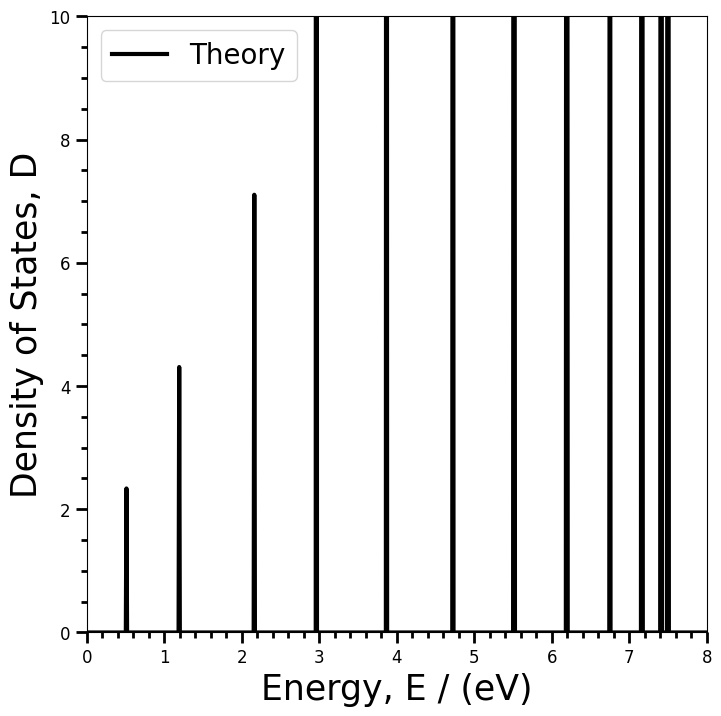

In [203]:
custom_plot_single([E_space], 
                   [D_th],
                   [r'Theory'],
                   [0,8],[0,10],[r'Energy, E / (eV)',r'Density of States, D'],'DOS.png',
                   ['k','r','b'],
                   3*['solid'],
                   3*[None],
                   3*['none'],
                   3*[3])